In [1]:
# import public packages
import os
import numpy as np
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
from matplotlib import colors
from matplotlib.patches import Rectangle
import scipy
import mne
import sys

from mne.time_frequency import tfr_morlet
from mne.baseline import rescale
from scipy.signal import spectrogram, hann, butter, filtfilt, hilbert
from scipy import signal, interpolate, stats
from scipy.interpolate import make_interp_spline, BSpline
from io import open
from importlib import reload
from scipy.stats import mannwhitneyu
import scipy.io as sio

# import own functions
from utils import find_folders
import dat_preproc
import fix_annot_onsets
import mat2fif
import baseline_correction
import normalization
import power_spectrum

### Add Directories/ Load Files

In [2]:
reload(find_folders)
onedrive = find_folders.get_onedrive_path()
project_path = find_folders.get_onedrive_path("entrainment")
print(project_path)

C:Users\mathiopv\OneDrive - Charité - Universitätsmedizin Berlin\ENTRAINMENT_PROJECT


In [ ]:
colors = {
    'nightblue': '#332288',
    'darkgreen': '#117733',
    'turquoise': '#44AA99',
    'lightblue': '#88CCEE',
    'sand': '#DDCC77',
    'softred': '#CC6677',
    'lila': '#AA4499',
    'purplered': '#882255'
}

%matplotlib qt
# Create a figure and axis
fig, ax = plt.subplots()

# Plot lines for each color
x = range(len(colors))
for i, (color_name, color_code) in enumerate(colors.items()):
    y = [i] * len(x)
    ax.plot(x, y, color=color_code, lw=5, label=color_code)

# Set the x-ticks and labels
ax.set_xticks(x)
ax.set_xticklabels(colors.keys())

# Set the legend
ax.legend()

# Display the plot
plt.show()

In [4]:
percept_ID = 'sub029_Ramp125'
fname = 'sub-000PStn_ses-2023021609252982_run-BrainSense20230216095000_Rec1_R2aRamp125.mat'

raw = mne.io.read_raw_fieldtrip(
    os.path.join(
        project_path,
        'data',
        'raw_data',
        'with_med_FTG',
        fname
    ),
    info = None
)

subID = 'sub029_Ramp125'

Creating RawArray with float64 data, n_channels=6, n_times=217125
    Range : 0 ... 217124 =      0.000 ...   868.496 secs
Ready.


c:\Users\mathiopv\Anaconda3\lib\site-packages\pymatreader\utils.py:230: UserWarning: Complex objects (like classes) are not supported. They are imported on a best effort base but your mileage will vary.
  warn('Complex objects (like classes) are not supported. '
C:\Users\mathiopv\AppData\Local\Temp\ipykernel_16500\1408029247.py:4: RuntimeWarning: Importing FieldTrip data without an info dict from the original file. Channel locations, orientations and types will be incorrect. The imported data cannot be used for source analysis, channel interpolation etc.
  raw = mne.io.read_raw_fieldtrip(
C:\Users\mathiopv\AppData\Local\Temp\ipykernel_16500\1408029247.py:4: RuntimeWarning: The supplied FieldTrip structure does not have an elec or grad field. No channel locations will extracted and the kind of channel might be inaccurate.
  raw = mne.io.read_raw_fieldtrip(
C:\Users\mathiopv\AppData\Local\Temp\ipykernel_16500\1408029247.py:4: RuntimeWarning: Cannot guess the correct type of channel LFP_S

In [ ]:
raw = mne.io.read_raw_fif(os.path.join(
    project_path,
        'data',
        'Fifs',
        'with_med_FTG',
        'Sub005_FIF.fif'
    )
)

subID = 'Sub005'

Using matplotlib as 2D backend.


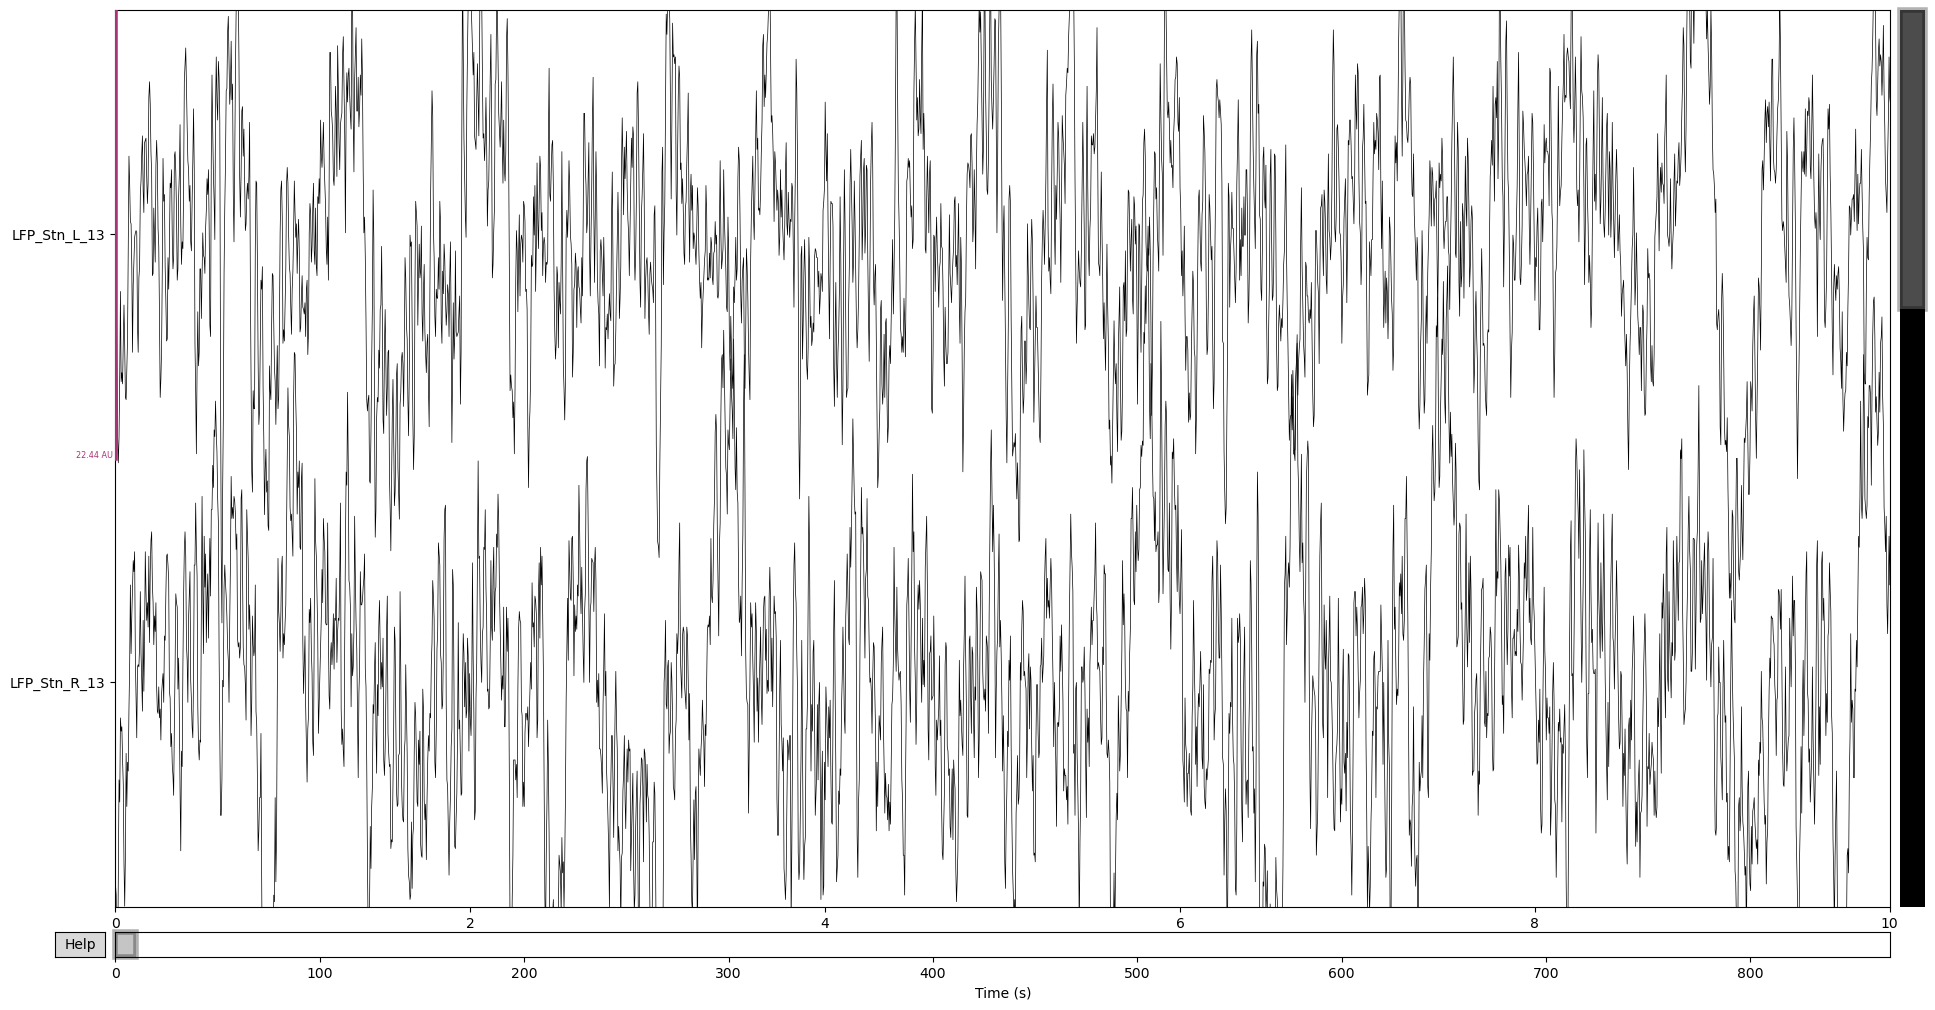

Channels marked as bad:
none


In [5]:
%matplotlib qt
raw.plot(n_channels = 2)

In [7]:
#First time making them
interactive_annot = raw.annotations
'''raw.annotations.save('Sub065_artefactsAnnotations1.csv', 
    overwrite = True)'''

"raw.annotations.save('Sub065_artefactsAnnotations1.csv', \n    overwrite = True)"

In [8]:
'''
my_annot = mne.Annotations(onset=new_onsets,  # in seconds
                           duration=interactive_annot.duration,  # in seconds, too
                           description=interactive_annot.description,
                           orig_time=raw.info['meas_date'])

reload(mat2fif)
%matplotlib qt
'''
new_raw = mat2fif.mat2fif(raw,interactive_annot)

Creating RawArray with float64 data, n_channels=6, n_times=217125
    Range : 0 ... 217124 =      0.000 ...   868.496 secs
Ready.


Channels marked as bad:
none


In [9]:
fif_name = os.path.join(project_path, 'data','Fifs','with_med_FTG','Sub029_Ramp125_FIF.fif'+'_.fif')
print(fif_name)

C:Users\mathiopv\OneDrive - Charité - Universitätsmedizin Berlin\ENTRAINMENT_PROJECT\data\Fifs\with_med_FTG\Sub029_Ramp125_FIF.fif_.fif


In [10]:
reload(dat_preproc)
%matplotlib qt
matplotlib.rc('font', size=10)
x = raw.get_data(reject_by_annotation = 'omit',picks=[0,1])
raw = raw
win_samp = 250
noverlap = 0.5
window = hann(win_samp, sym=False)
f, t, Sxx = dat_preproc.fft_rawviz(raw, x, win_samp, noverlap)


In [11]:
raw.save(fif_name,overwrite=True)

Writing C:Users\mathiopv\OneDrive - Charité - Universitätsmedizin Berlin\ENTRAINMENT_PROJECT\data\Fifs\with_med_FTG\Sub029_Ramp125_FIF.fif_.fif
    Writing channel names to FIF truncated to 15 characters with remapping
Closing C:Users\mathiopv\OneDrive - Charité - Universitätsmedizin Berlin\ENTRAINMENT_PROJECT\data\Fifs\with_med_FTG\Sub029_Ramp125_FIF.fif_.fif
[done]


C:\Users\mathiopv\AppData\Local\Temp\ipykernel_16500\1632398199.py:1: RuntimeWarning: This filename (C:Users\mathiopv\OneDrive - Charité - Universitätsmedizin Berlin\ENTRAINMENT_PROJECT\data\Fifs\with_med_FTG\Sub029_Ramp125_FIF.fif_.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw.save(fif_name,overwrite=True)


In [12]:
fft_name = str(subID)+'_FFT'
print(fft_name)
fft_fig = os.path.join(project_path, 'figures','FFTs','with_med_FTG\\')
#plt.savefig(str(fft_fig)+str(fft_name)+'_EXEMPLARY.pdf')
plt.savefig(str(fft_fig)+str(fft_name), dpi = 300)


sub029_Ramp125_FFT


In [13]:
fft_name = str(subID)+'_FFT'
#Saving the figures & files
fft_fig = os.path.join(project_path, 'figures','FFTs','with_med_FTG/')
fft_file = os.path.join(project_path, 'data','FFTs','with_med_FTG/')

#plt.savefig(str(fft_fig)+str(fft_name),dpi = 300)

np.save(str(fft_file)+str(fft_name)+'.npy',Sxx)

In [ ]:
#Saving the raw data as a fif file
raw2 = raw.copy()
Draw = raw2.get_data()
info = raw.info
new_raw = mne.io.RawArray(Draw, info)

fif_name = os.path.join(project_path, 'data','switching_freqs','Sub050/',str(subID)+'_FIF_125.fif')
new_raw.save(fif_name, overwrite = True)


In [ ]:
#Zscore Normalization of raw data & plot of new figure
reload(baseline_correction)
data = Sxx
t = t
baseline = (None, None)
raw = raw
stim_ch = 1
bs_data = baseline_correction.baseline_corr(data, t, baseline, raw = raw, stim_ch = 4)

In [ ]:
fft_fig = os.path.join(project_path, 'figures','FFts','test/')
fft_file = os.path.join(project_path, 'data','FFTs','test/')

plt.savefig(str(fft_fig)+str(fft_name)+'_zscored',dpi = 300)
np.save(str(fft_file)+str(fft_name)+'_zscored'+'.npy',bs_data)

In [ ]:
d = {'onset': [1, 503, 811],
    'duration': [30, 30, 10],
    'description': ['StimOff','StimOn','Rebound']
}

epoch_df = pd.DataFrame(data = d)
print(epoch_df)

In [ ]:
## Print Power Spectra with Raw Data
reload(dat_preproc)
filt_dat = raw.get_data()
time_onsets = epoch_df
window = 250
noverlap = 0.5
ylim2 = 0.4

fig = plt.figure(figsize = (12,5))

plt.subplot(1,2,1)
title1 = str(subID)+ '_LSTN'
ps1 = dat_preproc.epoch_ps(filt_dat, time_onsets, window, noverlap, 0, 0.1, title1)

plt.subplot(1,2,2)
title2 = str(subID)+ '_RSTN'
ps2 = dat_preproc.epoch_ps(filt_dat, time_onsets, window, noverlap, 1, 0.1, title2)

plt.show()

In [ ]:
## Printing the Power Spectra (RAW)
ps_all = np.concatenate((ps1,ps2), axis = 0)
ps_df = pd.DataFrame(np.transpose(ps_all),
    columns = ['StimOff_LSTN','StimOn_LSTN','Rebound_LSTN',
    'StimOff_RSTN','StimOn_RSTN','Rebound_RSTN'],
    )
print(ps_df)

In [ ]:
#Saving the figures & files
fft_fig = os.path.join(project_path, 'figures','Power_Spectra','without_med_FTG/')
fft_file = os.path.join(project_path, 'data','power_spectra','without_med_FTG/')

plt.savefig(str(fft_fig)+str(fft_name)+'_PS',dpi = 150)
ps_df.to_csv(str(fft_file)+str(fft_name)+'_PS.csv')

In [ ]:
## Print Power Spectra with Zscored Data
fig, axes = plt.subplots(1,1, figsize = (8,6))

side = 0

ps_m1s0 = np.mean(bs_data[side,:,epoch_df.onset[0]:epoch_df.onset[0]+ epoch_df.duration[0]],1)
ps_m1s1 = np.mean(bs_data[side,:,epoch_df.onset[1]:epoch_df.onset[1]+ epoch_df.duration[1]],1)
ps_reb = np.mean(bs_data[side,:,epoch_df.onset[2]:epoch_df.onset[2]+ epoch_df.duration[2]],1)

plt.plot(np.arange(1,127),ps_m1s0,label = epoch_df.description[0])
plt.plot(np.arange(1,127),ps_m1s1,label = epoch_df.description[1])
plt.plot(np.arange(1,127),ps_reb,label = epoch_df.description[2])
    
plt.xlim(60,90)
plt.xlabel('Frequency [Hz]')
plt.ylabel('LFP Power (z-scored)')
    
plt.legend()
plt.show()


In [ ]:
ps_allzscored_df = pd.DataFrame(
    {
        'Spontan': ps_m1s0,
        'StimOn': ps_m1s1,
        'Rebound': ps_reb
    }
)
print(ps_allzscored_df)

In [ ]:
plt.savefig(str(fft_fig)+str(fft_name)+'_Contra_zscoredPS',dpi = 150)
ps_allzscored_df.to_csv(str(fft_file)+str(fft_name)+'_Contra_zscoredPS.csv')

### Checking Spectral Width

In [ ]:
#Import the power spectrum csv
ps_tbl = pd.read_csv(os.path.join(
    project_path,
        'data',
        'power_spectra',
        'with_med_FTG',
        'Sub065_FFT_PS.csv'
))

subID = 'Sub065'

x1 = ps_tbl.StimOff_LSTN[50:101]
x2 = ps_tbl.StimOn_LSTN[50:101]
plt.plot(np.arange(0,51),x1)
plt.plot(np.arange(0,51),x2)
plt.xticks(np.arange(0,51,10), labels = np.arange(50,101,10))

plt.ylim(0,0.4)

In [ ]:
reload(power_spectrum)
%matplotlib qt

height = 0.04

peaks1, results_half1, peaks2, results_half2 = power_spectrum.powerSpectrum_width(x1, x2, height, subID)
print(results_half1)
print(results_half2)

In [ ]:
plt.savefig(os.path.join(
    project_path,
    'figures',
    'Power_Spectra',
    'with_med_FTG',
    str(subID)+'_PSWidth'
),
dpi = 150)

### Average all Power Spectra and Plot them

In [ ]:
## Interpolate and plot power spectrum
trial_ps = pd.read_csv(os.path.join(
    project_path,
        'data',
        'power_spectra',
        'test',
        'Sub005_FFT_PS.csv'
)
)

print(trial_ps)

In [ ]:
reload(dat_preproc)
dat_preproc.mypower(trial_ps['StimOff_RSTN'])
dat_preproc.mypower(trial_ps['StimOn_RSTN'])
plt.xlim(50,100)

In [ ]:
os.path.join(
   project_path,
   'data', 'power_spectra', 'test'
)

In [ ]:
print(ps_path)

In [ ]:
#loop through all csv files in ZSCORED
from scipy import stats
import glob

all_spontan = []
all_subh = []
col_names = []

ps_path = os.path.join(
   project_path,
   'data', 'power_spectra', 'without_med_FTG'
)

'''
for filename in os.listdir(ps_path):
   if filename.endswith('FFT_Ipsi_zscoredPS.csv'):
   #with open(os.path.join(ps_path, filename), 'r') as f: # open in readonly mode
      this_df = pd.read_csv(os.path.join(ps_path,filename))
      this_spontan = this_df['Spontan']
      this_subh = this_df['StimOn']


      all_spontan.append(this_spontan)
      all_subh.append(this_subh)

'''
pattern = os.path.join(ps_path, '*FFT_PS.csv')
file_list = glob.glob(pattern)



for file_path in file_list:
   filename = os.path.basename(file_path)
   if filename.startswith('Sub007') or filename.startswith('Sub050'): #or filename.startswith('Sub065'):
   #with open(os.path.join(ps_path, filename), 'r') as f: # open in readonly mode
         this_df = pd.read_csv(os.path.join(ps_path,filename))
         #this_spontan = this_df['StimOff_LSTN']
         this_subh = this_df['StimOn_LSTN']
   else: 
         this_df = pd.read_csv(os.path.join(ps_path,filename))
         #this_spontan = this_df['StimOff_RSTN']
         this_subh = this_df['StimOn_RSTN']
   sub_id = filename.split('_')[0]
   
   #all_spontan.append(this_spontan)
   all_subh.append(this_subh)
   col_names.append(sub_id)


In [ ]:
#all_spontan_df = pd.DataFrame(np.transpose(all_spontan))
all_subh_df = pd.DataFrame(np.transpose(all_subh))
all_subh_df.columns = col_names
print(all_subh_df)

In [ ]:
all_subh_df.to_excel(os.path.join(
    project_path,
   'data', 'power_spectra',
   'SubharmPS_without.xlsx'
))

Plot only the subharmonics and color code the Power Spectra

In [ ]:
#### IMPORT THEM ####
ps_path = 'data//power_spectra//'

df_without = pd.read_excel(os.path.join(
    project_path,
    ps_path,
    'SubharmPS_without.xlsx'
))

df_with = pd.read_excel(os.path.join(
    project_path,
    ps_path,
    'SubharmPS_with.xlsx'
))

all_subharms = [df_without, df_with]
all_subharms = pd.concat(all_subharms, axis = 1)

'''
#### SAVE IT ###
all_subharms.to_excel(os.path.join(
    project_path,
   'data', 'power_spectra',
   'All_Subharmonics62_PS.xlsx'
))
'''

In [ ]:
all_subharms = pd.read_excel(os.path.join(
    project_path,
    'data',
    'power_spectra',
    'All_Subharmonics62_PS.xlsx'
))

In [ ]:
#### PLOT THE PS TOGETHER AND COLOR CODE THE DIFFERENT STIM FREQS ####
%matplotlib qt
colDict = {}
legend_dict = {}
for key in ['Sub007', 'Sub005', 'Sub006','Sub009','Sub014']:
    colDict[key] = 130
for key in ['Sub021', 'Sub025','Sub028','Sub033','Sub043','Sub050','Sub017','Sub045','Sub065']:
    colDict[key] = 125

handles = []
labels = []

for col in all_subharms.columns:
    if col in colDict and colDict[col] == 130:
        line, = plt.plot(all_subharms[col], color='midnightblue')
        if 'Stim 130Hz' not in labels:
            handles.append(line)
            labels.append('Stim 130Hz')
    elif col in colDict and colDict[col] == 125:
        line, = plt.plot(all_subharms[col], color='crimson')
        if 'Stim 125Hz' not in labels:
            handles.append(line)
            labels.append('Stim 125Hz')
    else:
        plt.plot(all_subharms[col])

# Add labels and legend
plt.ylabel('LFP Power')
plt.xlabel('Frequency [Hz]')

plt.legend(handles, labels)

plt.xlim(50,90)
plt.ylim(0,0.5)

In [ ]:
plt.savefig(os.path.join(
    project_path,
    'figures',
    'Power_Spectra',
    'All_Subharmonics_PS'
),
dpi = 200)

plt.savefig(os.path.join(
    project_path,
    'figures',
    'Power_Spectra',
    'All_Subharmonics_PS.svg'
))

In [ ]:
%matplotlib qt
plt.plot(all_spontan_df,color = '#1f77b4',lw = 1, alpha = 1, label = 'Med On-Stim Off')
plt.plot(all_subh_df,color = 'red',lw = 1, alpha = 1, label = 'Med On-Stim On')

handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())

plt.xlim(50,90)
plt.ylim(0,0.5)
plt.xlabel('Frequency [Hz]')
plt.ylabel('LFP Power')

In [ ]:
plt.savefig(os.path.join(
    project_path,
    'figures',
    'Power_Spectra',
    'with_med_FTG',
    'AllSub_Ipsi_PowerSpectra'
),
dpi = 200)

In [ ]:
all_psSpontan = pd.read_csv(os.path.join(
    project_path,
        'results',
        'AllSpontan_PsZscored.csv'
))


all_psSubharm = pd.read_csv(os.path.join(
    project_path,
        'results',
        'AllSubharm_PsZscored.csv'
))

In [ ]:
all_psSpontan = all_psSpontan.drop('Sub029', axis=1)

In [ ]:
all_ps_mean1 = np.mean(all_psSpontan,1)
all_ps_sem1 = stats.sem(all_psSpontan,1)

all_ps_mean2 = np.mean(all_psSubharm,1)
all_ps_sem2 = stats.sem(all_psSubharm,1)

In [ ]:
plt.plot(np.arange(1,127), all_ps_mean1, label = 'Spontaneous FTG')
plt.fill_between(np.arange(1,127), all_ps_mean1-all_ps_sem1, all_ps_mean1+all_ps_sem1, alpha = 0.2)

plt.plot(np.arange(1,127), all_ps_mean2, label = 'DBS-Induced FTG')
plt.fill_between(np.arange(1,127), all_ps_mean2-all_ps_sem2, all_ps_mean2+all_ps_sem2, alpha = 0.2)

plt.xlim(50, 100)
plt.ylim(-0.4, 2)
plt.legend()

plt.xlabel('Frequency [Hz]')
plt.ylabel('LFP Power [z-scored]')
plt.title('Averaged Power Spectra [N = 6]')

In [ ]:
plt.savefig(os.path.join(
    project_path,
    'results',
    'Avg_PS'
),
dpi = 200)

In [ ]:
###Compare Power Spectra Widths

widths_tbl = pd.read_csv(os.path.join(
    project_path,
    'results',
    'PS_Widths.csv'
))
print(widths_tbl)

In [ ]:
import mlxtend
import seaborn as sns

In [ ]:
widths_all = np.concatenate((widths_tbl['WidthMed'],widths_tbl['WidthSubh']), axis = 0)
val_all = np.concatenate((np.repeat(0,8), np.repeat(1,8)), axis = 0)
widths_dict = {
    'widths': widths_all,
    'conds': val_all,
    'paired':[1,2,3,4,5,6,7,8,1,2,3,4,5,6,7,8]
}

df1=pd.DataFrame.from_dict(widths_dict)
print(df1)

In [ ]:
%matplotlib qt
ax = sns.boxplot(x='conds',y='widths',data=df1, boxprops=dict(alpha=.8), width = 0.3)
sns.stripplot(data=df1, x='conds',y='widths', jitter = 0, size = 10, edgecolor = 'black')
sns.lineplot(
    data=df1, x='conds',y='widths', units = 'paired',
    color=".7", estimator=None, 
    linestyle=':'
)
ax.set_xticklabels({'M1S0','M1S1'})
ax.set_xlabel('')
ax.set_ylabel('Widths [Freq Bins]')
plt.text(0.9,2.4,'p = .008')
plt.rcParams.update({'font.size': 15})

In [ ]:
statistic, p_value = mannwhitneyu(widths_tbl['WidthMed'], widths_tbl['WidthSubh'])
np.round(p_value, decimals = 4)

In [ ]:
p_value = mlxtend.permutation_test(
    widths_tbl['WidthMed'], widths_tbl['WidthSubh'], paired=True, method="approximate", seed=0, num_rounds=100000
)

print(p_value)

In [ ]:
np.round(p_value,decimals = 3)

In [ ]:
plt.savefig(os.path.join(
    project_path,
    'results',
    'PS_Widths'
),
dpi = 200)

In [ ]:
cdrs_df = pd.read_excel(os.path.join(
    project_path,
    'results',
    'Trial_CDRSAll.xlsx'
))
print(cdrs_df)

In [ ]:
score1 = cdrs_df.loc[(cdrs_df['Laterality'] == 'Total') & (cdrs_df['Cond'] == 1),"cdrs_score"]
score2 = cdrs_df.loc[(cdrs_df['Laterality'] == 'Total') & (cdrs_df['Cond'] == 3),"cdrs_score"]

p_value = mlxtend.permutation_test(
    np.array(score1), np.array(score2), paired=True, method="approximate", seed=0, num_rounds=100000
)

print(p_value)

In [ ]:
%matplotlib qt
sns.set_theme(style="ticks", palette="pastel")
ax = sns.boxplot(x='Cond',y='cdrs_score',hue = 'Laterality', palette = ['m','g'], data=cdrs_df, width = 0.7)
sns.stripplot(data=cdrs_df, x='Cond',y='cdrs_score',hue = 'Laterality', jitter = False, size = 10, dodge = True, palette = ['#7E1E9C','#054907'])
sns.lineplot(
    data=cdrs_df, x=cdrs_df['Cond']-1, y='cdrs_score', units= 'SubCode', hue = 'Laterality',
    color=".3",
    palette=['m','g'],
    linestyle=':', estimator = None
)
handles, labels = ax.get_legend_handles_labels()
l = plt.legend(handles[0:2], labels[0:2])
ax.set_ylim(-2,15)

ax.set_xlabel('')
ax.set_xticklabels(['M1S0','M1S1-PreSub','M1S1-Sub'])
ax.set_ylabel('CDRS Score')


In [ ]:
plt.savefig(os.path.join(
    project_path,
    'results',
    'CDRS_boxplot'
),
dpi = 200)

### Mean Bands 5Hz around the peak of the subharmonic

In [ ]:
all_subh = pd.read_excel(os.path.join(
    project_path,
    'data',
    'power_spectra',
    'SubhPeaks_MeanBand.xlsx'
))

'''all_cond3 = pd.read_json(os.path.join(
    project_path,
    'results',
    'accelerometer',
    'inspections',
    'all_features_cond3.json'
))'''

all_spontan = pd.read_excel(os.path.join(
    project_path,
    'data', 'power_spectra',
    'SpontanPeaks_MeanBand.xlsx'
))
all_spontan


In [ ]:
all_subh

In [ ]:
mean_actSB = np.mean(all_subh, axis = 0)
mean_actSB_df = pd.DataFrame([mean_actSB.index,mean_actSB]).T
mean_actSB_df.columns = ['Percept_ID', 'Avg_Subh']

mean_actSP = np.mean(all_spontan, axis = 0)
mean_actSP_df = pd.DataFrame([mean_actSP.index,mean_actSP]).T
mean_actSP_df.columns = ['Percept_ID', 'Avg_Spontan']


merged_df = pd.merge(mean_actSB_df, mean_actSP_df, on='Percept_ID')
merged_df

In [ ]:
import seaborn as sns
import mlxtend

bands_all = np.concatenate((merged_df['Avg_Spontan'],merged_df['Avg_Subh']), axis = 0)
val_all = np.concatenate((np.repeat(0,8), np.repeat(1,8)), axis = 0)
widths_dict = {
    'bands': bands_all,
    'conds': val_all,
    'paired':[1,2,3,4,5,6,7,8,1,2,3,4,5,6,7,8]
}

df1=pd.DataFrame.from_dict(widths_dict)
print(df1)

%matplotlib qt
ax = sns.boxplot(x='conds',y='bands',data=df1, boxprops=dict(alpha=.8), width = 0.3)
sns.stripplot(data=df1, x='conds',y='bands', jitter = 0, size = 10, edgecolor = 'black')
sns.lineplot(
    data=df1, x='conds',y='bands', units = 'paired',
    color=".7", estimator=None, 
    linestyle=':'
)
ax.set_xticklabels({'M1S0','M1S1'})
ax.set_xlabel('')
ax.set_ylabel('LFP Power')


'''p_value = mlxtend.permutation_test(
    merged_df['Avg_Spontan'], merged_df['Avg_Subh'], paired=True, method="approximate", seed=0, num_rounds=100000
)'''

statistic, p_value = mannwhitneyu(merged_df['Avg_Spontan'].tolist(), merged_df['Avg_Subh'].tolist())
p_value_round = np.round(p_value, decimals = 6)

print(p_value_round)

In [ ]:
np.round(np.mean(merged_df['Avg_Spontan']), decimals = 2)
#np.std(merged_df['Avg_Spontan'])

In [ ]:
np.round(p_value, decimals=3)

In [ ]:
from scipy.stats import shapiro, normaltest, kstest
_, kstest_p_value = kstest(y, 'norm')
kstest_p_value

In [ ]:
from scipy.stats import spearmanr, pearsonr

x = merged_sbh_df['Avg_Subh'].astype(np.float64)
y =  merged_sbh_df['freq'].astype(np.float64)


slope, intercept = np.polyfit(x, y, 1)
line = slope * x + intercept 
plt.scatter(x, y, color='blue', label='Data')
plt.plot(x, line, color='red', label='Least Squares Line')

rho, p_value = spearmanr(x, y)
print(p_value)

### Stim Parameters

In [ ]:
stim_pars = pd.read_excel(os.path.join(
    project_path,
    'results',
    'Amplitude_Dependent\\',
    'Stim_pars.xlsx'
))
print(stim_pars)

In [ ]:
coh1 = stim_pars.loc[stim_pars['Cohort'] == 1, 'StartAmp']
coh2 = stim_pars.loc[stim_pars['Cohort'] == 2, 'StartAmp']

In [ ]:
from scipy.stats import spearmanr

x = stim_pars['StartAmp']
y = stim_pars['SubhPower']
corr, p_value = spearmanr(x, y)
p_value

plt.scatter(x, y, label='Data')
slope, intercept = np.polyfit(x, y, 1)
line = slope * np.array(x) + intercept
plt.plot(x, line, color='r', label='Least Squares Line')

In [ ]:
%matplotlib qt
ax = sns.boxplot(x='Cohort',y='EndAmp',data=stim_pars, boxprops=dict(alpha=.8), width = 0.3)
sns.stripplot(data=stim_pars, x='Cohort',y='EndAmp', jitter = 0, size = 10, edgecolor = 'black')

ax.set_xticklabels({'No peak M1S0','With peak M1S0'})
ax.set_xlabel('')
ax.set_ylabel('Stimulation Amplitude')
plt.rcParams.update({'font.size': 15})

In [ ]:
'''import mlxtend
p_value = mlxtend.permutation_test(
    coh1, coh2, paired=False, method="approximate", seed=0, num_rounds=100000
)

print(np.round(p_value, decimals = 3))'''

statistic, p_value = mannwhitneyu(coh1, coh2)
p_value_round = np.round(p_value, decimals = 3)
p_value_round

In [ ]:
%matplotlib qt

fig, ax = plt.subplots(figsize = (8,8))

for i, row in stim_pars.iterrows():
    if row['Cohort'] == 1:
        ax.barh(row['AA']-1, row['HighestAmp'], color='#88CCEE', edgecolor = 'midnightblue')
    elif row['Cohort'] == 2:
        ax.barh(row['AA']-1, row['HighestAmp'], color='#AA4499', alpha = 0.6, edgecolor = 'darkred')
    elif row['Cohort'] == 3:
        ax.barh(row['AA']-1, row['HighestAmp'], color='grey', alpha = 0.6, edgecolor = 'black', hatch = '\\|')

    ax.plot([row['StartAmp'], row['EndAmp']], [row['AA']-1, row['AA']-1], color='black')
    ax.plot(row['StartAmp'], row['AA']-1, '|', color='black', mew = 2)
    ax.plot(row['EndAmp'], row['AA']-1, '|', color='black', mew = 2)

    ax.plot(stim_pars['ClinicalAmp'], stim_pars['AA']-1, '*', color='darkgreen', label='Clinical Amplitude', markersize = 8)

ax.set_xlim(0,4)
ax.set_yticks(np.arange(0,19))
yticklabels = ['#{}'.format(i) for i in np.arange(1,20)]
ax.set_yticklabels(yticklabels)
ytick_colors = ['red' if label in ['#8', '#10', '#12', '#13', '#14', '#15'] else 'black' for label in yticklabels]
# Set the colors of y-tick labels individually

for i, label in enumerate(ax.get_yticklabels()):
    label.set_color(ytick_colors[i])


ax.set_xlabel('Stimulation Amplitude [mA]')
ax.set_ylabel('STN')


In [ ]:
plt.savefig(os.path.join(
    project_path,
    'results',
    'Amplitude_Dependent',
    'Stim_PARS'
),
dpi = 200)

plt.savefig(os.path.join(
    project_path,
    'results',
    'Amplitude_Dependent',
    'Stim_PARS.pdf'
))

### Plot PS overlapping on point 63-65

In [ ]:
%matplotlib qt

all_subh_with = pd.read_excel(os.path.join(
    project_path,
    'data', 'power_spectra', 'SubharmPS_with.xlsx'
))

all_spontan_with = pd.read_excel(os.path.join(
    project_path,
    'data', 'power_spectra', 'SpontanPS_with.xlsx'
))

colDict = {}
legend_dict = {}
for key in ['Sub005', 'Sub006','Sub009','Sub014']:
    colDict[key] = 130
for key in ['Sub017','Sub045','Sub065']:
    colDict[key] = 125
for key in 'Sub029':
    colDict[key] = 145

handles = []
labels = []
x = np.arange(0, 126)
x2 = np.arange(0, 126)
offset = x[65] - x2[71]
x2_shifted = x2 + offset

for col in all_subh_with.columns:
    if col in colDict and colDict[col] == 130:
        line, = plt.plot(x, all_subh_with[col], color='#CC6677', alpha=0.8, lw=3)
        if 'Entrained Activity M1S1' not in labels:  
            handles.append(line)
            labels.append('Entrained Activity M1S1')
        line, = plt.plot(x, all_spontan_with[col], color='#332288', alpha=0.8, lw=3)
        if 'Spontaneous Activity M1S0' not in labels:  
            handles.append(line)
            labels.append('Spontaneous Activity M1S0')
    elif col in colDict and colDict[col] == 125:
        line, = plt.plot(x[3:], all_subh_with[col][:-3], color='#CC6677', alpha=0.8, lw=3)
        line, = plt.plot(x[3:], all_spontan_with[col][:-3], color='#332288', alpha=0.8, lw=3)
    else:
        line, = plt.plot(x2_shifted, all_subh_with['Sub029'], color='#CC6677', alpha=0.8, lw=3)
        line, = plt.plot(x2_shifted, all_spontan_with['Sub029'], color='#332288', alpha=0.8, lw=3)

plt.xlim(60, 90)
plt.ylim(0, 0.5)
plt.legend(handles, labels)
plt.xticks(np.arange(60,95,5), labels = ['-5','1:2\nEntrainment', '+5','+10','+15','+20','+25'])
plt.xlabel('Frequency [Hz]')
plt.ylabel('LFP Power')
plt.show()

In [ ]:
plt.savefig(os.path.join(
    project_path,
    'figures',
    'Power_Spectra',
    'PS_withMed_AdjustedSubhPoint0'
),
dpi = 200)

plt.savefig(os.path.join(
    project_path,
    'figures',
    'Power_Spectra',
    'PS_withMed_AdjustedSubhPoint0.pdf'
))